<a href="https://colab.research.google.com/github/VivekMuraleedharanGit/HuggingFace-Learnings/blob/main/Pipeline_indepth_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Pipeline function in detail

In this notebooks i will add the under the hood functionalities of pipelines in details

First stage - The raw input text will convert into the tokens using the tokenizer function 

In [ ]:
! pip install datasets transformers[sentencepiece]

In [ ]:
# will use the auto tokenizer librbary from transformers

from transformers import AutoTokenizer
# model which we are going to use to generate tokens will be given as the checkpoint 
checkpoint = "distilbert-base-uncased-finetuned-sst-2-english" 
tokenizer = AutoTokenizer.from_pretrained(checkpoint)



In [4]:
text_input= ['I love that movie',"The heroine wasn't that good though"]

#converting the text into tokens with the checkpoint
#padding added due to unequal sentences 
#truncation used to truncate the input if it goes above the model size
#returning pytorch tensors 
input = tokenizer(text_input,padding=True,truncation=True,return_tensors="pt")
print(input)

{'input_ids': tensor([[  101,  1045,  2293,  2008,  3185,   102,     0,     0,     0,     0],
        [  101,  1996, 18869,  2347,  1005,  1056,  2008,  2204,  2295,   102]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 0, 0, 0, 0],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])}


The output itself is a dictionary containing two keys, input_ids and attention_mask. input_ids contains two rows of integers (one for each sentence) that are the unique identifiers of the tokens in each sentence. 

# Model

We can perform the same task above by downloading the pretrained model from the library

In [15]:
from transformers import AutoModelForSequenceClassification
checkpoint = "distilbert-base-uncased-finetuned-sst-2-english"
model = AutoModelForSequenceClassification.from_pretrained(checkpoint)

given some inputs, it outputs what we’ll call hidden states, also known as features. For each model input, we’ll retrieve a high-dimensional vector representing the contextual understanding of that input by the Transformer mode

In the next stage of the hidden state will pass to the model head as input and gives output contains two values
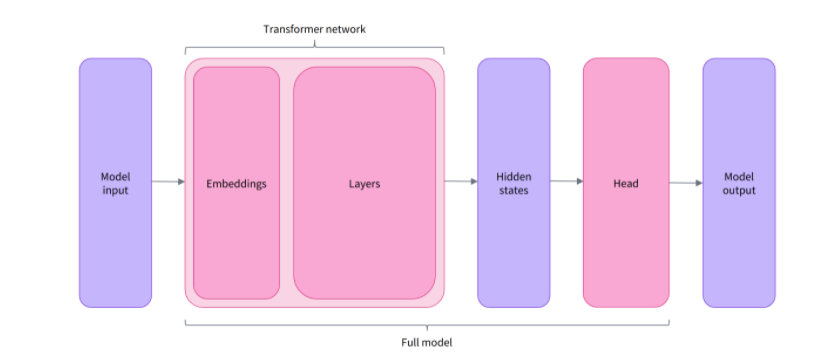

In [19]:
outputs = model(**input)
print(outputs.logits.shape)

torch.Size([2, 2])


In the next stage this logits will pass through a softmax layer to convert it them to the probabilities of positive or negative sentiment

In [20]:
print(outputs.logits)

tensor([[-4.3270,  4.6723],
        [ 4.3578, -3.4841]], grad_fn=<AddmmBackward>)


In [21]:
import torch

predictions = torch.nn.functional.softmax(outputs.logits, dim=-1)
print(predictions)

tensor([[1.2349e-04, 9.9988e-01],
        [9.9961e-01, 3.9275e-04]], grad_fn=<SoftmaxBackward>)


In [22]:
# the index of the predictios in the model configuration can be get from 
model.config.id2label

{0: 'NEGATIVE', 1: 'POSITIVE'}

So here we can conclude that about the outputs like:


*   1st sentence - 0.9999 positive,0.0001 negative
*   2nd sentence - 0.9996 negative , 0.0003 positive



In [25]:
from transformers import pipeline 
classifier = pipeline("sentiment-analysis")

classifier(text_input)

[{'label': 'POSITIVE', 'score': 0.9998764991760254},
 {'label': 'NEGATIVE', 'score': 0.999607264995575}]